In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../Assignment-1/Data/SF_Crime_Data_Focus_Cleaned.csv', parse_dates=["Incident Date"])

df_prostitution = df[df["Incident Category"] == "PROSTITUTION"].copy()

# Part 3: Putting everything you've learned to work
### Now you've learned about lots of time-series analysis tricks and visualization. That means it's time for you to think for yourself with a slightly more independent exercise.

### Exercise: Using all the tools to understand the temporal trends of prostitution in SF over time.

- It's quite simple really, I'd like you to present your own analysis of what happens to the PROSTITUTION crime type in SF over time.
    - Hint 1: So think about trends over time, does every district show the same behavior?, or the same beahavior over time?, are there hotspots?, etc. A fancy way of saying this is: think about quantifying and explaining spatio-temporal patterns.
    - Hint 2: It's a good idea to think of this exercise as a way to show off what you've learned about data analysis in this and the previous lectures: so it's a good idea to include many of the types of plots from the curriculum so far in your analysis.
- As an extra little thing, I also want you to reflect on the role of data errors in an analysis. Data errors could be things like imprecise GPS points, or imprecise recording of time.

## Temporal Trend Analysis

### Prostitution pr year 

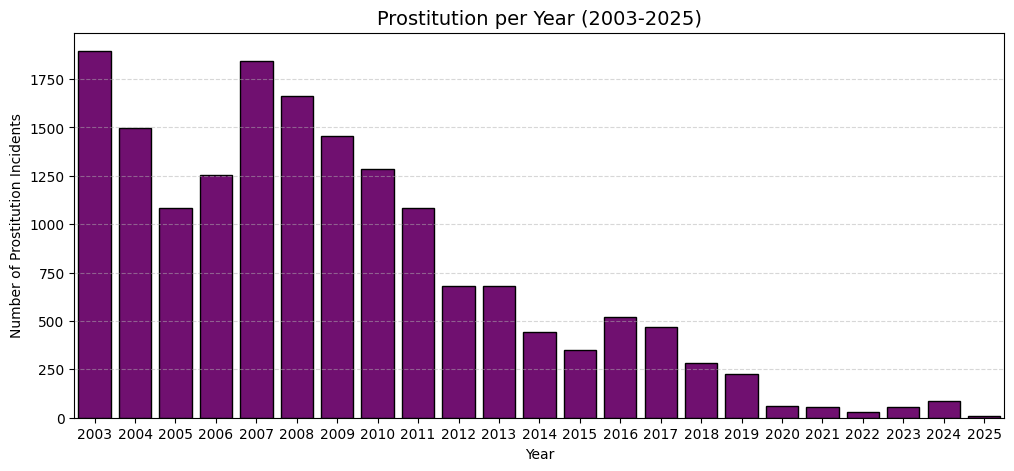

In [63]:
df_prostitution["Year"] = df_prostitution["Incident Date"].dt.year
prostitution_per_year = df_prostitution["Year"].value_counts().sort_index()

plt.figure(figsize=(12, 5))
sns.barplot(x=prostitution_per_year.index, y=prostitution_per_year.values, color="purple", edgecolor="black")
plt.title("Prostitution per Year (2003-2025)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Prostitution Incidents")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


There is a significant decline in prostitution cases from 2003 to 2025. The numbers peaked in 2003, followed by a gradual decrease. However, there was a temporary rise in the late 2000s, especially in 2007. After 2010, the cases steadily declined, reaching very low levels by 2020 and beyond.

### Prostitution pr Month 

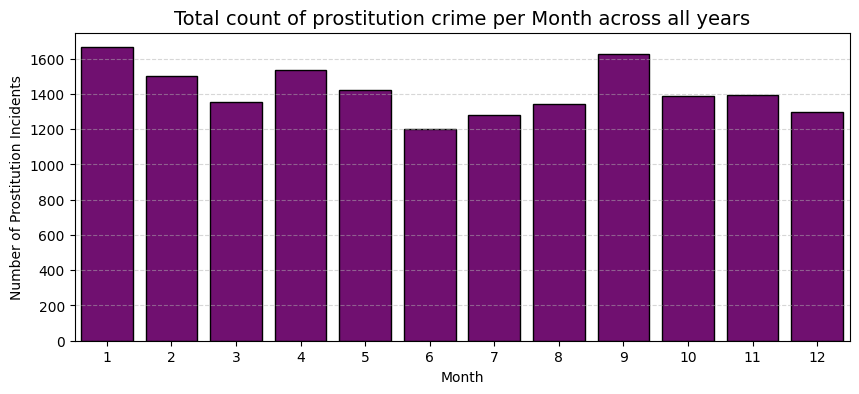

In [64]:
df_prostitution["Month"] = df_prostitution["Incident Date"].dt.month
prostitution_per_month = df_prostitution["Month"].value_counts().sort_index()

plt.figure(figsize=(10, 4))
sns.barplot(x=prostitution_per_month.index, y=prostitution_per_month.values, color="purple", edgecolor="black")
plt.title("Total count of prostitution crime per Month across all years", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Prostitution Incidents")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


Based on the chart, prostitution in San Francisco occurs fairly consistently throughout the year, with notable peaks in January and September. There is a visible dip in June, but overall, the monthly variation is moderate, indicating that prostitution activity remains relatively steady year-round, with some seasonal fluctuations.

### Prostitution pr Week

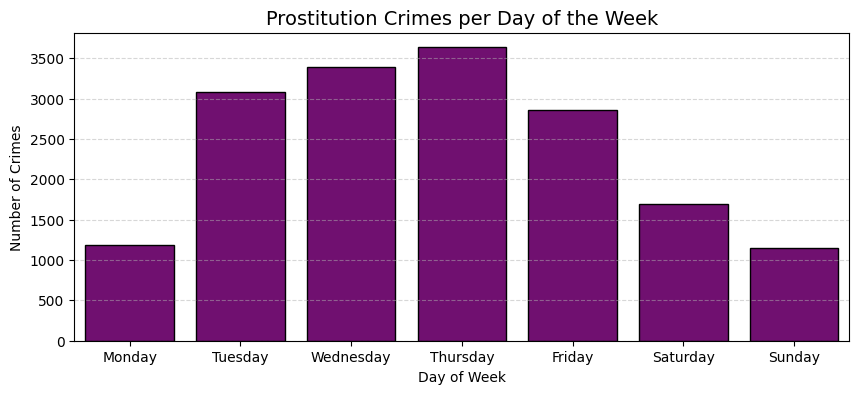

In [65]:

df_prostitution["Day of Week"] = df_prostitution["Incident Date"].dt.day_name()
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
prostitution_per_weekday = df_prostitution["Day of Week"].value_counts().reindex(weekday_order)

plt.figure(figsize=(10, 4))
sns.barplot(x=prostitution_per_weekday.index, y=prostitution_per_weekday.values, color="purple", edgecolor="black")
plt.title("Prostitution Crimes per Day of the Week", fontsize=14)
plt.xlabel("Day of Week")
plt.ylabel("Number of Crimes")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


It can be seen that prostitution crimes in San Francisco peak midweek, especially on Tuesday, Wednesday, and Thursday. Activity drops significantly over the weekend, with Sunday showing the lowest count.

## Spatial Analysis

### Prostitution crimes by Police District

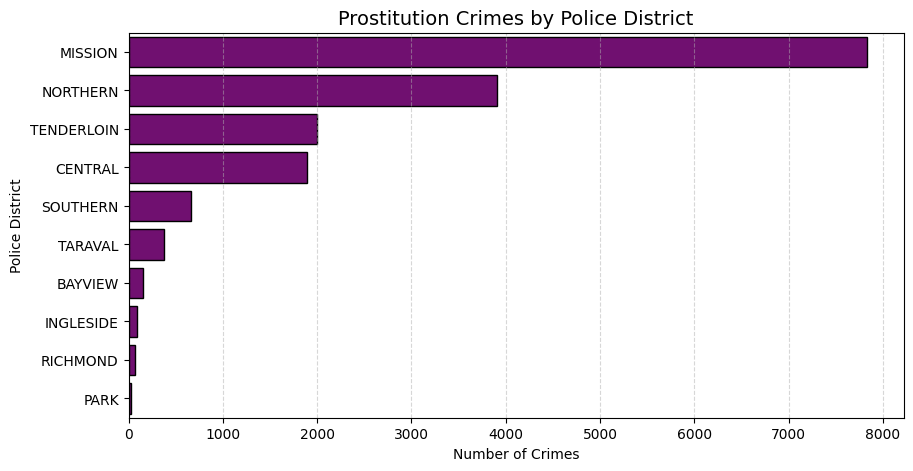

In [71]:
prostitution_by_district = df_prostitution["Police District"].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=prostitution_by_district.values, y=prostitution_by_district.index, color="purple", edgecolor="black")
plt.title("Prostitution Crimes by Police District", fontsize=14)
plt.xlabel("Number of Crimes")
plt.ylabel("Police District")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


The Mission and Northern police districts account for the vast majority of prostitution-related crimes in San Francisco, with Tenderloin and Central also showing relatively high counts. This indicates that prostitution activity is heavily concentrated in a few key areas, while several other districts see very little activity.

## Yearly Trend of Prostitution Crimes Across Police Districts

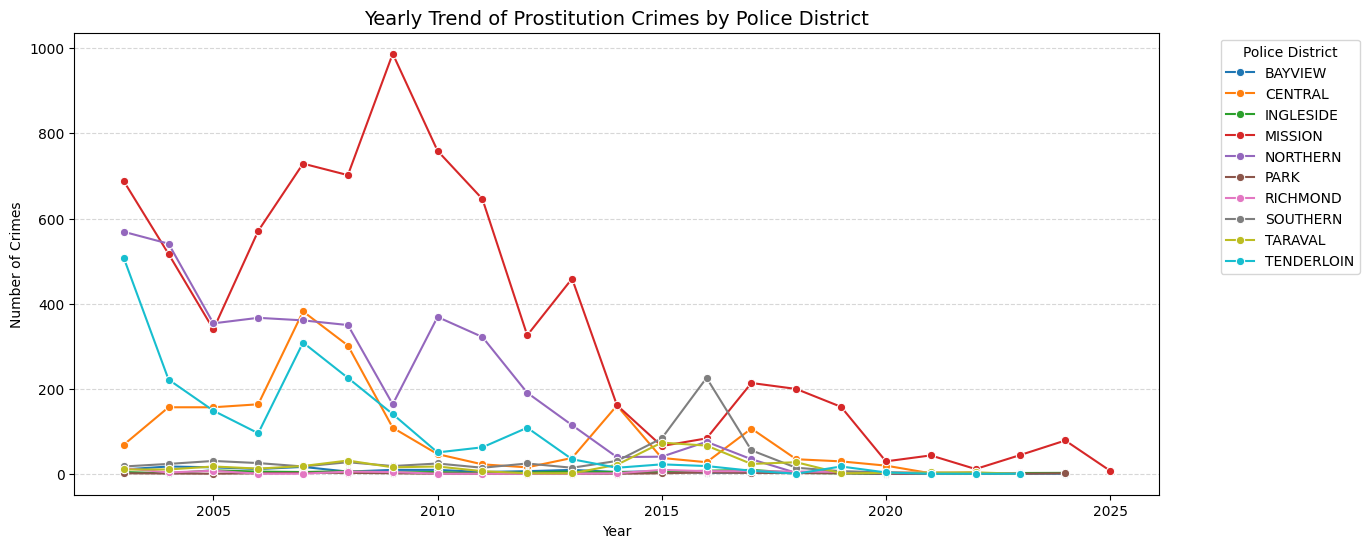

In [46]:
prostitution_trend_by_district = df_prostitution.groupby(["Year", "Police District"]).size().reset_index(name="Count")

plt.figure(figsize=(14, 6))
sns.lineplot(data=prostitution_trend_by_district, x="Year", y="Count", hue="Police District", marker="o")
plt.title("Yearly Trend of Prostitution Crimes by Police District", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Police District", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


It is highlighted that prostitution crimes have declined sharply across all police districts since the mid-2000s. The Mission and Northern districts consistently reported the highest levels of prostitution-related crimes, particularly during the early years (2003-2010). After 2015, the reported incidents in all districts dropped significantly.

## Heatmap over hotspots for prostitution in San Francisco

In [ ]:
import folium
from folium.plugins import HeatMap

# Initialize the map centered on San Francisco
sf_map = folium.Map(location=[37.7749, -122.4194], zoom_start=12)

# Extract coordinates into list format (only rows with valid coordinates)
heat_data = df_prostitution[["Latitude", "Longitude"]].dropna().values.tolist()
HeatMap(heat_data, radius=10, blur=15, max_zoom=1).add_to(sf_map)

sf_map


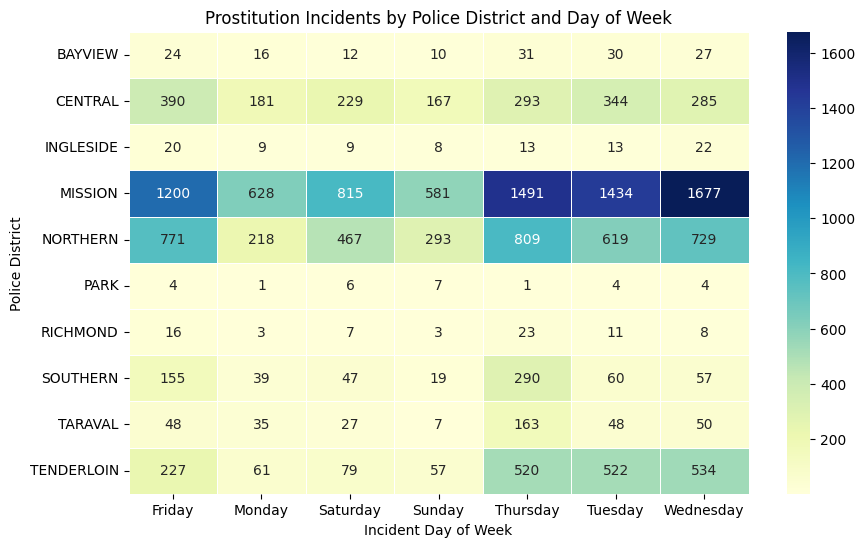

In [ ]:
pivot = df_prostitution.pivot_table(index='Police District', columns='Incident Day of Week', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.title('Prostitution Incidents by Police District and Day of Week')
plt.show()


The heatmap reveals that prostitution-related incidents in San Francisco tend to cluster in specific areas, with clear hotspots concentrated in neighborhoods such as the Mission District and parts of Downtown. These areas show consistently higher incident density compared to outer residential neighborhoods. This spatial pattern highlights the localized nature of prostitution activity, which may be influenced by factors such as nightlife, commercial zones, and law enforcement focus. 

## Jitter plot

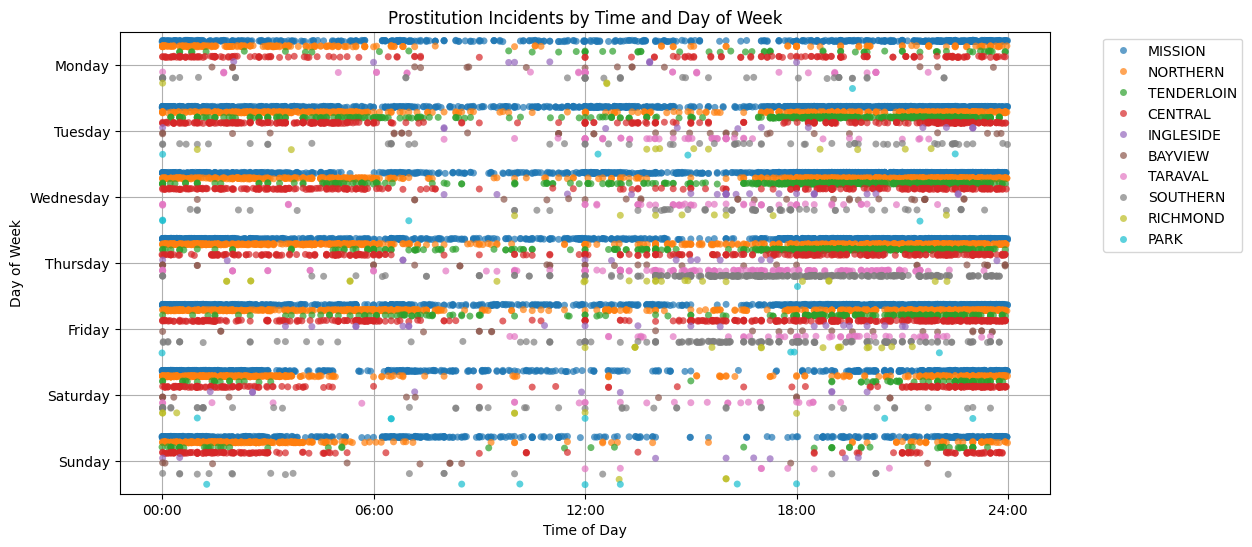

In [86]:
# Ensure the days are ordered correctly
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_prostitution['Incident Day of Week'] = pd.Categorical(df_prostitution['Incident Day of Week'], categories=day_order, ordered=True)

# Convert time to minutes since midnight for easier plotting
def time_to_minutes(time_str):
    hours, minutes = map(int, time_str.split(':'))
    return hours * 60 + minutes

df_prostitution['Incident Minutes'] = df_prostitution['Incident Time'].apply(time_to_minutes)

# Create the flipped stripplot (time on x-axis, day on y-axis)
plt.figure(figsize=(12, 6))
sns.stripplot(
    y='Incident Day of Week',
    x='Incident Minutes',
    data=df_prostitution,
    jitter=True,
    hue='Police District',
    dodge=True,
    alpha=0.7
)

# Fix x-axis to show regular time intervals (every 6 hours)
plt.xticks(
    [0, 360, 720, 1080, 1440],  # minutes since midnight
    ['00:00', '06:00', '12:00', '18:00', '24:00']  # actual time labels
)

plt.title('Prostitution Incidents by Time and Day of Week')
plt.xlabel('Time of Day')
plt.ylabel('Day of Week')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()


The visualization reveals clear temporal patterns in prostitution-related incidents across San Francisco. The majority of incidents are reported during the late-night hours (midnight to early morning) and afternoon to early evening. This suggests two key peaks of activity: one corresponding to nightlife and after-hours movement, and another potentially linked to daytime commercial activity.

Across all days of the week, the Mission, Tenderloin, and Central police districts consistently show higher incident densities, reflecting longstanding hotspots for prostitution activity. These patterns are fairly consistent across weekdays and weekends, though weekend nights (Friday and Saturday) show slightly elevated activity levels.

This temporal analysis highlights the importance of time-targeted law enforcement strategies and community interventions, particularly during high-activity periods such as late nights and afternoons.

## As an extra little thing, I also want you to reflect on the role of data errors in an analysis. Data errors could be things like imprecise GPS points, or imprecise recording of time.

- Data errors can seriously mess with the accuracy of any analysis. Things like imprecise GPS coordinates or wrongly recorded times can throw off your entire understanding of when and where events happened. This can lead to incorrect patterns, misplaced hotspots, or even false trends. 
Some errors are random (just noise), while others are systematic (pushing all the data in a certain direction). Either way, they make it harder to trust the results. To deal with this, you can clean the data — for example, by removing obvious outliers or smoothing weird spikes. You could also combine data from different sources to cross-check for accuracy.
